<a href="https://colab.research.google.com/github/534Bhavani/OIBSIP/blob/main/OIBSIPTASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME : TANGIRALA BHAVANI**

**DATASCIENCE_@OASIS INFOBYE**

**TASK 5:**

**PROJECT NAME_@SALES PREDICTION USING PYTHON**

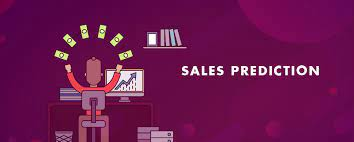

# INFO :

1.Sales prediction using machine learning is a process that uses algorithms to analyze historical sales data and predict future sales.

2.Machine learning uses techniques like regression analysis, time-series analysis, and decision trees to generate more accurate forecasts based on multiple factors.

3.Machine learning can help businesses make informed decisions about inventory management, resource allocation, and overall sales strategy.

4.It can also help monitor market trends and create targeted marketing campaigns.

5.Machine learning uses neural networks, which are a machine learning algorithm that identify various patterns in historical data.

6.Machine learning can analyze huge data sets, so its predictions are much more accurate than those performed by humans.

# ACCURACY

**According to Entrepreneur, businesses using predictive analytics could forecast future revenue with 82% accuracy.**

# Key steps to predict the SALES :

**1.Data preprocessing**

**2.Model training**

**3.Accuracy evaluation**

**4.Backend API creation using Flask**

**5.Frontend application development using React and Bootstrap**

**6.Deployment process to platforms like Heroku and Netlify**

# PROBLEM STATEMENT

**Sales prediction** means predicting how much of a product people will buy based on factors such as the
amount you spend to advertise your product, the segment of people you advertise for, or the platform
you are advertising on about your product.Typically, a product and service-based business always need
their Data Scientist to predict their **future** sales with every step they take to manipulate the cost of
advertising their product. So lets start the task of sales prediction with **machine learning using Python**.


# Approach

The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Using Regression
learning algorithms that’s best fit for the above case.

# Procedure

Step 1 : Import Libraries and Dataset

Step 2 : Data Pre-processing
        1. Data Type and conversion
        2. Removing Irrelevant Columns
        3. Identifying & Treatment Missing Value
        4. Identifying & Treatment Outliers
        5. Descriptive Analysis
        6. Correlation
        
Step 3 : Data Visualization

Step 4 : Multicollinearity
        
Step 5 : Data Partition  

Step 6 : Model Building

        Assumption of Model

         6.1  Linearity
         
         6.2  Normality
         
         6.3  Homoscedasicity
         
         6.4  Model Error has to be independently identificaly Distibuted

         Conclusion

# STEP_1: Import libraries and DATASET.

In [ ]:
################################## Data Analysis & Calculation ##################################

import pandas as pd
import numpy as np

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# DATA import

In [ ]:
df = pd.read_csv(r"/Advertising.csv")
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# STEP 2 : DATA_PREPROCESSING

1.Data Type and conversion

2.Removing Irrelevant Columns

3.Identifying & Treatment Missing Value

4.Identifying & Treatment Outliers

5.Descriptive Analysis

6.Correlation


**2.1 Data Type and conversions**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


*** All the columns are numerical except Target column**

**2.2 Removing Irrelevent Columns**

In [ ]:
df = df.drop('ID', axis = 1)

**2.3 Identifying and Treatment of Missing Values**

In [ ]:
# count the number of NaN values in each column
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**No Missing values present in dataset**

**2.4 Identifying And Treatment of Outliers**

<Axes: >

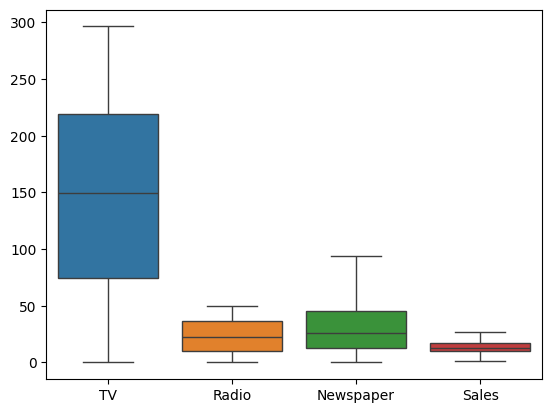

In [ ]:
sns.boxplot(data=df)

**2.4.1 Winsorizing Technique to remove outliers**

In [ ]:
q1 = df['Newspaper'].quantile(0.25)
q3 = df['Newspaper'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

93.625

In [ ]:
df['Newspaper']=np.where(df['Newspaper'] > upper_limit,upper_limit,df['Newspaper']) # upper limit

<Axes: >

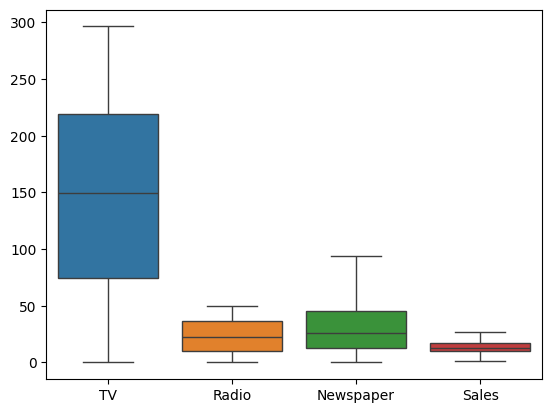

In [ ]:
sns.boxplot(data=df)

**2.5 Descriptive Analysis**

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.415750,14.022500
std,85.854236,14.846809,21.316901,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,93.625000,27.000000


In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.059325,0.782224
Radio,0.054809,1.000000,0.355953,0.576223
Newspaper,0.059325,0.355953,1.000000,0.231432
Sales,0.782224,0.576223,0.231432,1.000000


**STEP 3: DATA VISUALIZATION**

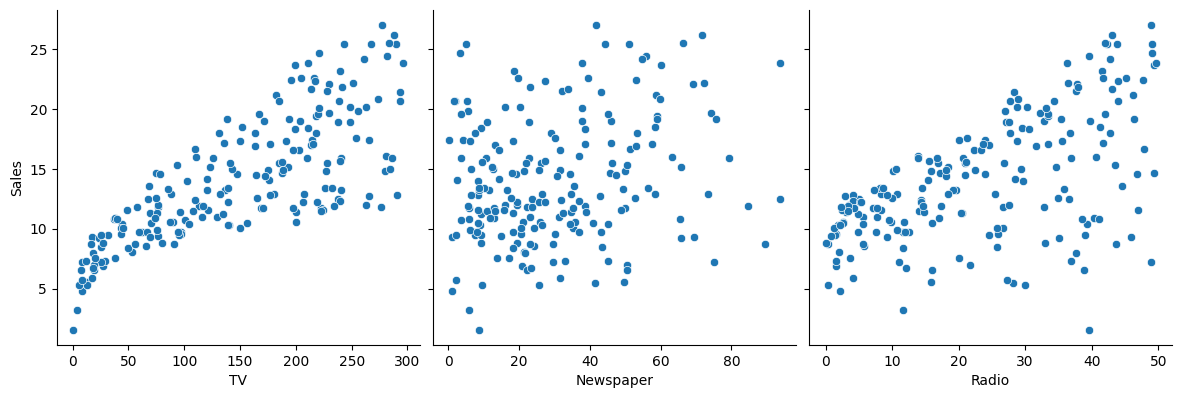

In [ ]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<Axes: >

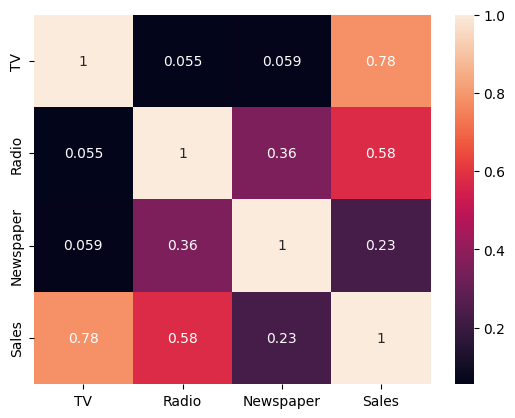

In [ ]:
sns.heatmap(df.corr(),annot = True)

**TV have 78% strong positve correlation with Sales**

*  TV have high impact on Sales.
*  There is no colinearity in data, So every platform is independent.

**STEP 4: MULTI COLLINEARITY**

In [ ]:
X1=df.drop(['Sales'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i)
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

TV           2.500402
Radio        3.304735
Newspaper    3.115816
dtype: float64

**STEP 5 : DATA PARTITION**

In [ ]:
# Putting feature variable to X
X = df.drop('Sales', axis= 1)

# Putting response variable to y
y = df[['Sales']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

* No collinearity in the data, indicate no multi colinearity

**STEP 6: MODEL BUILDING**

* H0 :- There is no Linear relationship between sales and tv , radio & newspaper

* Vs

* H1 :- There is Linear relationship between sales and tv , radio & newspaper

Alpha = 0.05 (5%)



In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Sales ~ TV + Radio + Newspaper',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.58e-96
Time:                        11:44:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9387      0.313      9.400      0.000       2.322       3.555
TV             0.0458      0.001     32.805      0.000       0.043       0.049
Radio          0.1885      0.009     21.876      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.171      0.864      -0.013       0.011
==============================================================================
Omnibus:                       60.392   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.131
Skew:                          -1.327   Prob(JB):                     1.52e-33
Kurtosis:                       6.330   Cond. No.                         455.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between sales and tv , radio

* 91% is accuracy of model , so we say model is good fit
* Y = 2.9211 + 0.0458 * TV + 0.1880 * Radio

**6.1_ASSUMPTION OF MODEL**

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

**6.2_LINEARITY**

<Axes: title={'center': 'Sales vs TV'}, xlabel='TV', ylabel='Sales'>

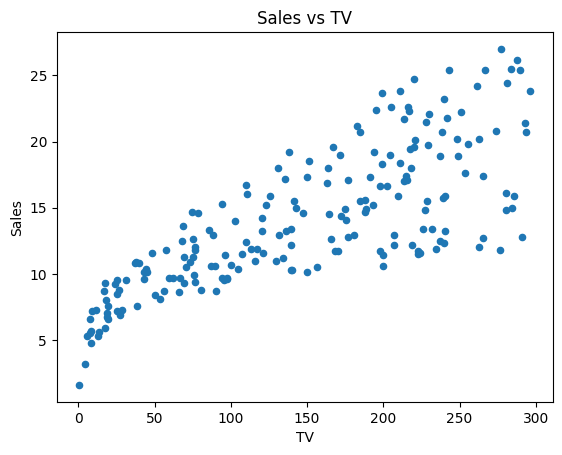

In [ ]:
df.plot.scatter(x='TV', y='Sales', title='Sales vs TV')

**6.2 Homoscedasicity**

**6.3 : NORMALITY**

**6.4 : MODEL ERROR IID**

In [ ]:
print(X_train)

        TV  Radio  Newspaper
111  241.7   38.0       23.2
156   93.9   43.5       50.5
140   73.4   17.0       12.9
171  164.5   20.9       47.4
157  149.8    1.3       24.3
..     ...    ...        ...
10    66.1    5.8       24.2
126    7.8   38.9       50.6
158   11.7   36.9       45.2
0    230.1   37.8       69.2
167  206.8    5.2       19.4

[140 rows x 3 columns]


In [ ]:
print(y_train)

     Sales
111   21.8
156   15.3
140   10.9
171   14.5
157   10.1
..     ...
10     8.6
126    6.6
158    7.3
0     22.1
167   12.2

[140 rows x 1 columns]


In [ ]:
print(X_test)

        TV  Radio  Newspaper
87   110.7   40.6     63.200
118  125.7   36.9     79.200
80    76.4   26.7     22.300
198  283.6   42.0     66.200
62   239.3   15.5     27.300
108   13.1    0.4     25.600
101  296.4   36.3     93.625
199  232.1    8.6      8.700
32    97.2    1.5     30.000
178  276.7    2.3     23.700
35   290.7    4.1      8.500
125   87.2   11.8     25.900
163  163.5   36.8      7.400
160  172.5   18.1     30.700
161   85.7   35.8     49.300
46    89.7    9.9     35.700
74   213.4   24.6     13.100
136   25.6   39.0      9.300
6     57.5   32.8     23.500
39   228.0   37.7     32.000
1     44.5   39.3     45.100
191   75.5   10.8      6.000
41   177.0   33.4     38.700
20   218.4   27.7     53.400
131  265.2    2.9     43.000
103  187.9   17.2     17.900
109  255.4   26.9      5.500
73   129.4    5.7     31.300
166   17.9   37.6     21.600
5      8.7   48.9     75.000
82    75.3   20.3     32.500
76    27.5    1.6     20.700
91    28.6    1.5     33.000
81   239.8    

In [ ]:
print(y_test)

     Sales
87    16.0
118   15.9
80    11.8
198   25.5
62    15.7
108    5.3
101   23.8
199   13.4
32     9.6
178   11.8
35    12.8
125   10.6
163   18.0
160   14.4
161   13.3
46    10.6
74    17.0
136    9.5
6     11.8
39    21.5
1     10.4
191    9.9
41    17.1
20    18.0
131   12.7
103   14.7
109   19.8
73    11.0
166    8.0
5      7.2
82    11.3
76     6.9
91     7.3
81    12.3
183   26.2
9     10.6
110   13.4
64    18.0
2      9.3
38    10.1
75     8.7
102   14.8
13     9.7
146   13.2
45    14.9
188   15.9
17    24.4
7     13.2
152   16.6
83    13.6
100   11.7
90    11.2
187   17.3
19    14.6
69    22.3
168   17.1
18    11.3
48    14.8
170    8.4
53    21.2


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
res= model.predict(X_test)
print(res)

[[15.75332841]
 [15.84513821]
 [11.3974781 ]
 [24.25254503]
 [17.10150494]
 [ 3.54041086]
 [23.91398069]
 [15.41345857]
 [ 7.76312768]
 [16.43011099]
 [17.37074015]
 [ 9.17363628]
 [17.35124997]
 [14.41529835]
 [13.62387212]
 [ 8.97921377]
 [17.49502631]
 [11.20142284]
 [11.62902532]
 [20.68139901]
 [12.29325015]
 [ 8.35601437]
 [17.48556663]
 [18.45957155]
 [16.06736172]
 [14.93311864]
 [19.88971438]
 [10.07629062]
 [10.62342478]
 [12.47652678]
 [10.20221202]
 [ 4.42865478]
 [ 4.50956959]
 [15.05673009]
 [24.64900997]
 [12.81588652]
 [15.22249684]
 [16.99940959]
 [12.30527224]
 [ 9.86149831]
 [11.96156197]
 [18.02835285]
 [ 8.81674112]
 [15.55414445]
 [15.35466744]
 [18.93849006]
 [23.66485644]
 [12.13005501]
 [16.50715302]
 [14.35475422]
 [14.31483042]
 [10.07765402]
 [17.21031432]
 [14.24265486]
 [21.2749561 ]
 [17.57568327]
 [ 9.89452433]
 [16.66741369]
 [ 7.33748624]
 [20.19238655]]


In [ ]:
print("Accuracy Score: ", model.score(X_test,y_test)*100)

Accuracy Score:  83.6800820009546


In [ ]:
model.coef_

array([[0.04759516, 0.1846734 , 0.00382337]])

In [ ]:
model.intercept_

array([2.74516655])

In [ ]:
0.05473199* 69.2 + 7.14382225

10.931275958

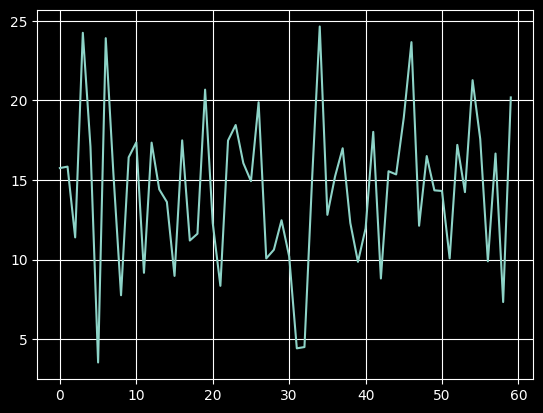

In [ ]:
plt.style.use('dark_background')
plt.grid()
plt.plot(res)

**PREDICTION ON TEST DATA**

In [ ]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,TV,Radio,Newspaper,Sales
87,110.7,40.6,63.2,16.0
118,125.7,36.9,79.2,15.9
80,76.4,26.7,22.3,11.8
198,283.6,42.0,66.2,25.5
62,239.3,15.5,27.3,15.7


**TRAIN ACCURACY**

from sklearn.metrics

import r2_score

r2 = r2_score(df_test.Sales, df_test.Prediction)

print('R2 score for model Performance on Test',

np.round(r2,2))


* R2 score for model Performance on Test 0.85

* Model is good fit on Train dataset & Performance of model on Test data is also good fit


In [ ]:
print("Accuracy Score: ", model.score(X_test,y_test)*100)

Accuracy Score:  83.6800820009546


# CONCLUSION

* We can conclude that we understood the statistical technique and modelling preocedure for sales prediction dataset.

* We predict 90 % accuracy on train dataset and 85 % accuracy on test dataset which is good fit.

* TV marketing has highest impact on Sales compairing to Radio and Newspaper.

* All assumptions of Linear Regression are working good in case of Sales Prediction.

**THANK YOU OASIS INFOBYTE**